In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install numpy matplotlib pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('twitter_training.csv')
data.shape

(74682, 3)

In [5]:
data.sample(10)

,PLATFORM,ANALYSIS,REVIEW
50844,FIFA,Negative,. What a shame
42530,PlayerUnknownsBattlegrounds(PUBG),Positive,Coming to @ PUBG with @ gtuckgaming and the te...
19895,WorldOfCraft,Negative,Yo uhhhhh Blizz<unk> it again damn
22853,CS-GO,Neutral,if
6152,Amazon,Negative,Jeff Bezos should shut down Amazon and say fuc...
54176,CallOfDuty,Negative,@ CfDuty @ Afghanistan Whether you can remove ...
7155,Overwatch,Neutral,SUPER LIVE with SUPER JUICE !!. . . . twitch...
16957,PlayStation5(PS5),Positive,. @ debsy _ dee is a good gift.
18322,PlayStation5(PS5),Neutral,And Watch The New PlayStation 5 Collection Dem...
23597,Google,Neutral,you


In [6]:
data.isnull().sum()

PLATFORM      0
ANALYSIS      0
REVIEW      686
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

PLATFORM    0
ANALYSIS    0
REVIEW      0
dtype: int64

In [9]:
data.sample()

,PLATFORM,ANALYSIS,REVIEW
31931,LeagueOfLegends,Negative,URF is NOT an Find All | League 5 Legends yout...


In [10]:
data.drop(columns=['PLATFORM','ANALYSIS'], inplace=True)

In [11]:
data.sample()

,REVIEW
45952,@verizonfios Why is Verizon now charging me an...


In [12]:
from textblob import TextBlob

In [13]:
data.head()

,REVIEW
0,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...
2,im getting on borderlands and i will kill you ...
3,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...


In [14]:
data.shape

(73996, 1)

In [15]:
TextBlob("I am coming to the borders").sentiment.polarity

0.0

In [16]:
polarity =[]
for i in data['REVIEW']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)
len(polarity)

73996

In [17]:
data['Polarity'] = polarity

In [18]:
data.sample()

,REVIEW,Polarity
69369,You find that somewhere thats always a silver ...,0.140952


In [19]:
data['Polarity'] = data['Polarity'].round()

In [20]:
print("Positive Comment : ",(data['Polarity']==1).sum())
print("Nutral Comment : ",(data['Polarity']==0).sum())
print("Nagetive Comment",(data['Polarity']==-1).sum())

Positive Comment :  7381
Nutral Comment :  63244
Nagetive Comment 3371


In [21]:
positive = data['Polarity']== 1
Nautral = data['Polarity']== 0
Nagative = data['Polarity']== -1

In [22]:
positive_comment = data[positive]
positive_comment.sample(10)

,REVIEW,Polarity
3645,it's awesome.,1.0
40228,As a Battlefield 4 Stars fan.. me I am happy,1.0
23188,Thank God you Lord @TeamEndpoint... Delightful...,1.0
29564,"@ PlayApex. Animation. Good god, I can wait. y...",1.0
38227,.. The Protector Cup. Here are your top 3:.. @...,1.0
22927,CS: GO TEAM APPRECIATION POST!.. You all playe...,1.0
1158,Always good but @ashly_burch's performance of ...,1.0
67077,Johnson + Johnson $JNJ Has An Excellent,1.0
70742,Guess who is now the proud owner of Barrett M8...,1.0
71354,"Great concept art, though I'm glad we won't ha...",1.0


In [23]:
from wordcloud import WordCloud, STOPWORDS

In [83]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [25]:
data['REVIEW']

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    Just realized that the Windows partition of my...
74678    Just realized that my Mac window partition is ...
74679    Just realized the windows partition of my Mac ...
74680    Just realized between the windows partition of...
74681    Just like the windows partition of my Mac is l...
Name: REVIEW, Length: 73996, dtype: object

In [26]:
type(data['REVIEW'])

pandas.core.series.Series

In [27]:
all_positive_reviews = " ".join(positive_comment['REVIEW'])
type(all_positive_reviews)

str

In [35]:
import tkinter as tk
from tkinter import simpledialog
from PIL import Image
import PIL.Image



Create a WordCloud for 5000 Words



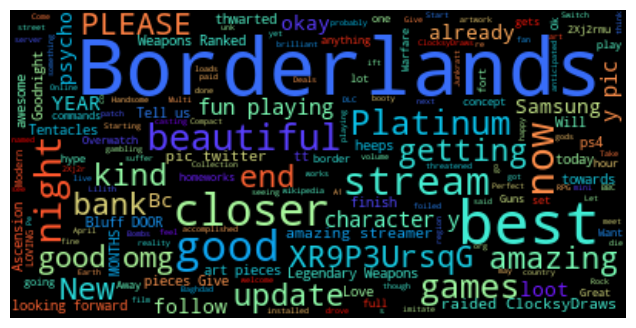

In [91]:
all_positive_reviews = " ".join(positive_comment['REVIEW'])

def user_input():
    root = tk.Tk()
    root.withdraw()  
    input_value = simpledialog.askstring("Input", "Please Enter Your Number")
    return input_value
obj = user_input()
obj = int(obj)
print(f"Create a WordCloud for {obj} Words")
print()

all_positive_reviews = " ".join(positive_comment['REVIEW'])
wordcloud = WordCloud( stopwords=STOPWORDS, background_color='black',contour_color='red',colormap="rainbow", contour_width=1).generate(all_positive_reviews[0:obj])
plt.figure(figsize=(30,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()